In [19]:
# CS5002 Project 1 - Part 1
# Author: Xiaoyuan Lu
# NUID: 002034691

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Derivatives and Optimization

This section introduces derivatives and their role in function optimization. It prepares the foundation for implementing gradient descent.

In [21]:
def f1(x):
    return x**2

def deriv_f1(x):
    return 2 * x

def f2(x):
    return x**2 - 2 * x + 3

def deriv_f2(x):
    return 2 * x - 2

In [22]:
def gradient_descent(f, df, x0, alpha, epsilon, iter_max):
    x = x0
    iter_count = 0
    while iter_count < iter_max:
        x_new = x - alpha * df(x)
        if abs(x_new - x) < epsilon:
            break
        x = x_new
        iter_count += 1
    return x, iter_count

In [23]:
def plot_opt(f, optimal_x, title):
    x_vals = np.linspace(-5, 5, 400)
    y_vals = f(x_vals)
    plt.figure()
    plt.plot(x_vals, y_vals, label='Function')
    plt.scatter(optimal_x, f(optimal_x), color='red', label='Optimal x')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Section 2: Gradient Descent

This section focuses on implementing the gradient descent algorithm and applying it to simple quadratic functions.

In [24]:
def tuning_tests():
    alpha = 0.1
    epsilon = 0.001
    iter_max = 1000

    print("\nTesting with different x0:")
    for x0 in [3, -3]:
        for f, df, name in [(f1, deriv_f1, "f1"), (f2, deriv_f2, "f2")]:
            opt_x, iters = gradient_descent(f, df, x0, alpha, epsilon, iter_max)
            print(f"{name} with x0={x0}: Optimal x = {opt_x:.4f}, Iterations = {iters}")

    print("\nTesting with different alpha:")
    for alpha in [1, 0.001, 0.0001]:
        opt_x, iters = gradient_descent(f1, deriv_f1, 3, alpha, epsilon, iter_max)
        print(f"alpha={alpha}: Optimal x = {opt_x:.4f}, Iterations = {iters}")

    print("\nTesting with different epsilon:")
    for epsilon in [0.1, 0.01, 0.0001]:
        opt_x, iters = gradient_descent(f1, deriv_f1, 3, 0.1, epsilon, iter_max)
        print(f"epsilon={epsilon}: Optimal x = {opt_x:.4f}, Iterations = {iters}")

### 2.1 Quadratic Functions

We implement and test gradient descent on two quadratic functions: $f_1(x) = x^2$ and $f_2(x) = x^2 - 2x + 3$.

In [25]:
def f3(x):
    return np.sin(x) + np.cos(np.sqrt(2) * x)

def deriv_f3(x):
    return np.cos(x) - np.sqrt(2) * np.sin(np.sqrt(2) * x)

In [26]:
def plot_f3():
    x_vals = np.linspace(0, 10, 500)
    y_vals = f3(x_vals)
    plt.figure()
    plt.plot(x_vals, y_vals, label='f3(x)')
    plt.title('Function f3(x) = sin(x) + cos(sqrt(2)x)')
    plt.xlabel('x')
    plt.ylabel('f3(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [27]:
def test_f3_minima():
    x0_values = [1, 4, 5, 7]
    alpha = 0.1
    epsilon = 0.0001
    iter_max = 1000

    x_vals = np.linspace(0, 10, 500)
    y_vals = f3(x_vals)
    plt.figure()
    plt.plot(x_vals, y_vals, label='f3(x)')

    for x0 in x0_values:
        opt_x, _ = gradient_descent(f3, deriv_f3, x0, alpha, epsilon, iter_max)
        plt.scatter(opt_x, f3(opt_x), label=f'x0={x0}')

    plt.title('Gradient Descent on f3 with Different Starting Points')
    plt.xlabel('x')
    plt.ylabel('f3(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

## Section 3: Derivative Approximation for One Variable

This section approximates derivatives numerically to simulate scenarios where analytical forms are not available.

In [28]:
def approx_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

In [29]:
def gradient_descent_approx(f, x0, alpha, epsilon, iter_max):
    x = x0
    iter_count = 0
    while iter_count < iter_max:
        x_new = x - alpha * approx_derivative(f, x)
        if abs(x_new - x) < epsilon:
            break
        x = x_new
        iter_count += 1
    return x, iter_count

In [30]:
def test_approximation():
    for f, name in [(f1, "f1"), (f2, "f2")]:
        print(f"\nTesting derivative approximation for {name}:")
        for x in [1, 2, 3]:
            exact = deriv_f1(x) if name == "f1" else deriv_f2(x)
            approx = approx_derivative(f, x)
            print(f"x={x}: exact = {exact:.4f}, approx = {approx:.4f}")

## Section 4: Gradient Descent for Two Variables

Here we generalize gradient descent to two-variable functions and visualize the optimization process in 3D.

In [31]:
def f_multi(x, y):
    return x**2 + y**2

## Section 5: Report Summary

This section summarizes the structure, implementation, and findings from this project.

In [32]:
def approx_partial_deriv(f, x, y, var='x', h=1e-5):
    if var == 'x':
        return (f(x + h, y) - f(x, y)) / h
    else:
        return (f(x, y + h) - f(x, y)) / h

In [33]:
def gradient_descent_2d(f, x0, y0, alpha, epsilon, iter_max):
    x, y = x0, y0
    for _ in range(iter_max):
        dx = approx_partial_deriv(f, x, y, 'x')
        dy = approx_partial_deriv(f, x, y, 'y')
        x_new = x - alpha * dx
        y_new = y - alpha * dy
        if abs(x_new - x) < epsilon and abs(y_new - y) < epsilon:
            break
        x, y = x_new, y_new
    return x, y

In [34]:
def plot_2d_result():
    from mpl_toolkits.mplot3d import Axes3D
    x_vals = y_vals = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f_multi(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    opt_x, opt_y = gradient_descent_2d(f_multi, 3, 3, 0.1, 0.001, 1000)
    ax.scatter(opt_x, opt_y, f_multi(opt_x, opt_y), color='r', s=50)
    ax.set_title("Gradient Descent on f(x, y) = x^2 + y^2")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.show()

## Main Function

In [35]:
def main():
    # Section 2.1: Gradient Descent on simple functions
    opt1, _ = gradient_descent(f1, deriv_f1, 3, 0.1, 0.001, 1000)
    plot_opt(f1, opt1, "Gradient Descent on f1(x) = x^2")

    opt2, _ = gradient_descent(f2, deriv_f2, 3, 0.1, 0.001, 1000)
    plot_opt(f2, opt2, "Gradient Descent on f2(x) = x^2 - 2x + 3")

    # Section 2.1: Parameter tuning experiments
    tuning_tests()

    # Section 2.2: Complex function analysis
    plot_f3()
    test_f3_minima()

    # Section 3: Numerical derivative testing
    test_approximation()

    # Section 4: Two-variable function optimization
    plot_2d_result()

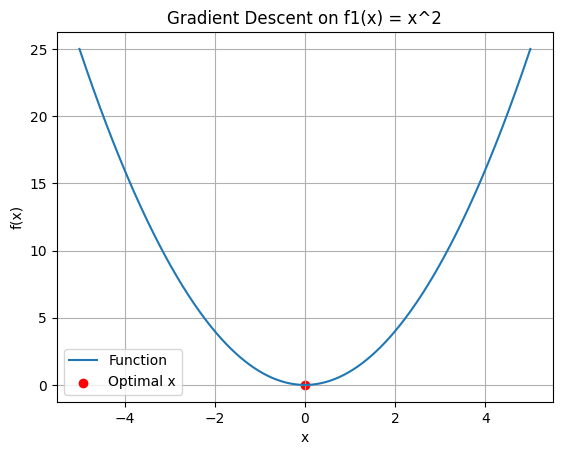

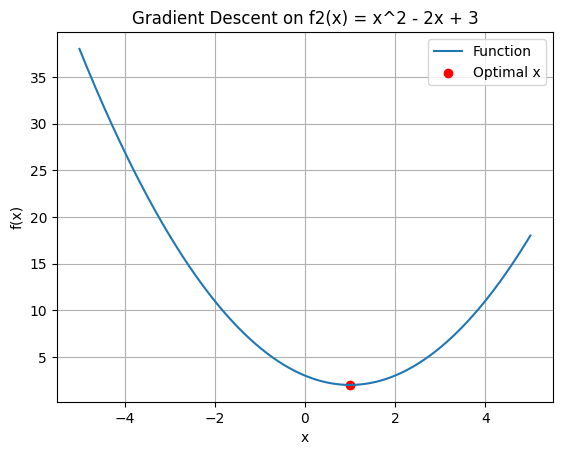


Testing with different x0:
f1 with x0=3: Optimal x = 0.0046, Iterations = 29
f2 with x0=3: Optimal x = 1.0048, Iterations = 27
f1 with x0=-3: Optimal x = -0.0046, Iterations = 29
f2 with x0=-3: Optimal x = 0.9950, Iterations = 30

Testing with different alpha:
alpha=1: Optimal x = 3.0000, Iterations = 1000
alpha=0.001: Optimal x = 0.5000, Iterations = 895
alpha=0.0001: Optimal x = 3.0000, Iterations = 0

Testing with different epsilon:
epsilon=0.1: Optimal x = 0.4027, Iterations = 9
epsilon=0.01: Optimal x = 0.0432, Iterations = 19
epsilon=0.0001: Optimal x = 0.0005, Iterations = 39


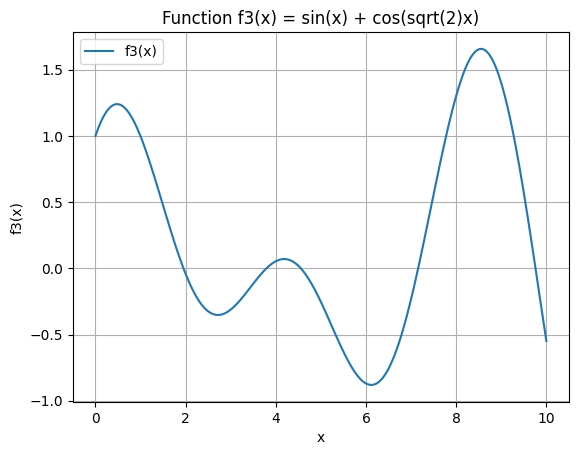

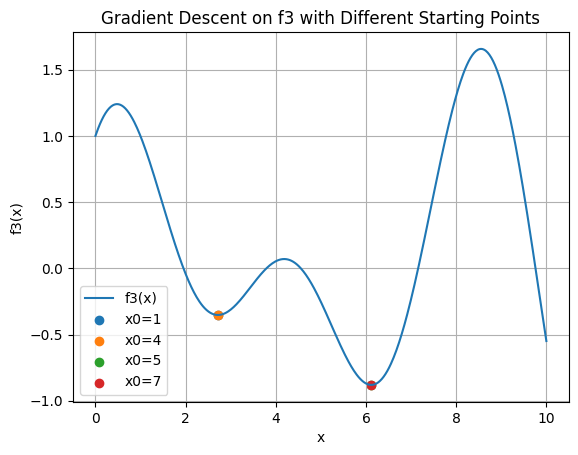


Testing derivative approximation for f1:
x=1: exact = 2.0000, approx = 2.0000
x=2: exact = 4.0000, approx = 4.0000
x=3: exact = 6.0000, approx = 6.0000

Testing derivative approximation for f2:
x=1: exact = 0.0000, approx = 0.0000
x=2: exact = 2.0000, approx = 2.0000
x=3: exact = 4.0000, approx = 4.0000


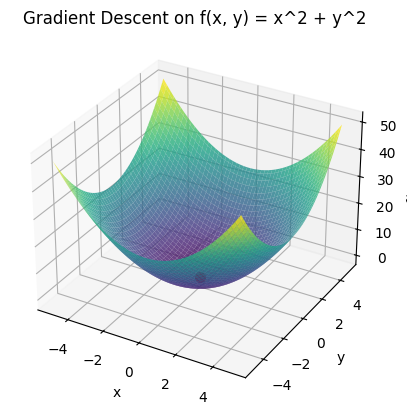

In [36]:
main()